<a href="https://colab.research.google.com/github/TanayY/100DaysofMLCode/blob/master/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import all the necessary packages.

from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [0]:
data = pd.read_pickle('Visual Product Similarity/16k_apperal_data_preprocessed')


In [0]:
#Make one-hot keys for brand and color.

data['brand'].fillna(value="Not given", inplace=True )

brands = [x.replace(" ", "-") for x in data['brand'].values]
types = [x.replace(" ", "-") for x in data['product_type_name'].values]
colors = [x.replace(" ", "-") for x in data['color'].values]

brand_vectorizer = CountVectorizer()
brand_features = brand_vectorizer.fit_transform(brands)

type_vectorizer = CountVectorizer()
type_features = type_vectorizer.fit_transform(types)

color_vectorizer = CountVectorizer()
color_features = color_vectorizer.fit_transform(colors)

extra_features = hstack((brand_features, type_features, color_features)).tocsr()

In [0]:
#making word2vec model
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

with open('Applied_AI_Workshop_Code_Data/word2vec_model', 'rb') as handle:
    model = pickle.load(handle)

In [0]:
#making model for idf based word2vec

idf_title_vectorizer = CountVectorizer()
idf_title_features = idf_title_vectorizer.fit_transform(data['title'])

vocab = model.keys()
def build_avg_vec(sentence, num_features, doc_id, m_name):
    featureVec = np.zeros((num_features,), dtype="float32")
    nwords = 0
    
    for word in sentence.split():
        nwords += 1
        if word in vocab:
            if m_name == 'weighted' and word in  idf_title_vectorizer.vocabulary_:
                featureVec = np.add(featureVec, idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[word]] * model[word])
            elif m_name == 'avg':
                featureVec = np.add(featureVec, model[word])
    if(nwords>0):
        featureVec = np.divide(featureVec, nwords)
    return featureVec

In [0]:
#creating numpy array with all idf based word2vecs
doc_id = 0
w2v_title_weight = []
for i in data['title']:
    w2v_title_weight.append(build_avg_vec(i, 300, doc_id,'weighted'))
    doc_id += 1
w2v_title_weight = np.array(w2v_title_weight)

In [0]:
#data = pd.read_pickle('Visual Product Similarity/16k_apperal_data_preprocessed')
df_asins = list(data['asin'])
asins = list(asins)

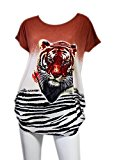

Product Title:  burnt umber tiger tshirt zebra stripes xl  xxl 
Euclidean Distance from input image: 1.3633005525127146
Amazon Url: www.amzon.com/dp/B00JXQB5FQ


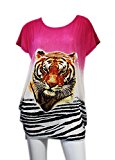

Product Title:  pink tiger tshirt zebra stripes xl  xxl 
Euclidean Distance from input image: 7.491546012148229
Amazon Url: www.amzon.com/dp/B00JXQASS6


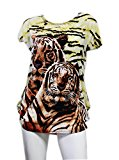

Product Title:  yellow tiger tshirt tiger stripes  l 
Euclidean Distance from input image: 9.56135172400491
Amazon Url: www.amzon.com/dp/B00JXQCUIC


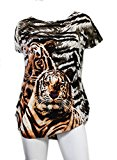

Product Title:  brown  white tiger tshirt tiger stripes xl  xxl 
Euclidean Distance from input image: 10.140573983526394
Amazon Url: www.amzon.com/dp/B00JXQCWTO


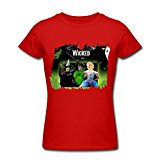

Product Title:  womans wicked musical poster shirts red xxl 
Euclidean Distance from input image: 10.780264129710947
Amazon Url: www.amzon.com/dp/B01KUN4VWE


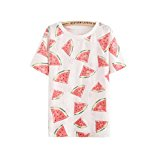

Product Title:  womens thin style tops tees pastel watermelon print 
Euclidean Distance from input image: 10.870851822043965
Amazon Url: www.amzon.com/dp/B01JUNHBRM


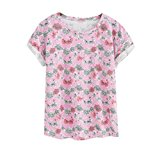

Product Title:  kawaii pastel tops tees pink flower design 
Euclidean Distance from input image: 10.875544891357421
Amazon Url: www.amzon.com/dp/B071FCWD97


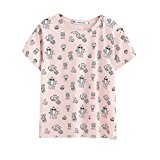

Product Title:  kawaii cotton pastel tops tees peach pink cactus design 
Euclidean Distance from input image: 10.98107322692871
Amazon Url: www.amzon.com/dp/B071WYLBZS


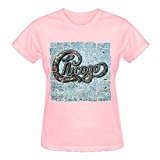

Product Title:  chicago chicago 18 shirt women pink 
Euclidean Distance from input image: 10.986809997703144
Amazon Url: www.amzon.com/dp/B01GXAZTRY


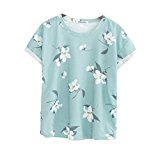

Product Title:  kawaii pastel tops tees baby blue flower design 
Euclidean Distance from input image: 10.988183389043973
Amazon Url: www.amzon.com/dp/B071SBCY9W


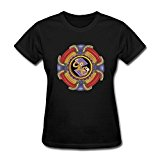

Product Title:  dasy womens neck electric light orchestra logo shirt xxlarge black 
Euclidean Distance from input image: 11.010623956060574
Amazon Url: www.amzon.com/dp/B016EXUZC4


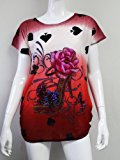

Product Title:  red  pink floral heel sleeveless shirt xl  xxl 
Euclidean Distance from input image: 11.03284050002248
Amazon Url: www.amzon.com/dp/B00JV63QQE


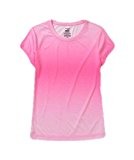

Product Title:  danskin womens vneck loose performance tee xsmall pink ombre 
Euclidean Distance from input image: 11.041462554931641
Amazon Url: www.amzon.com/dp/B01F7PHXY8


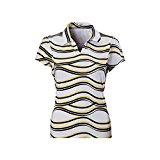

Product Title:  nancy lopez whimsy short sleeve  whiteblacklemon drop  xs 
Euclidean Distance from input image: 11.046903252935573
Amazon Url: www.amzon.com/dp/B01MPX6IDX


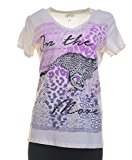

Product Title:  edv cheetah run purple multi xl 
Euclidean Distance from input image: 11.056559777593778
Amazon Url: www.amzon.com/dp/B01CUPYBM0


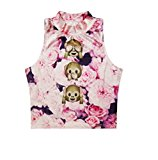

Product Title:  kingde star pink flower dog stamp sleeveless vestbqn24 
Euclidean Distance from input image: 11.060559716558622
Amazon Url: www.amzon.com/dp/B015H3W9BM


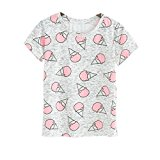

Product Title:  womens tops tees pastel peach ice cream cone print 
Euclidean Distance from input image: 11.061641006614277
Amazon Url: www.amzon.com/dp/B0734GRKZL


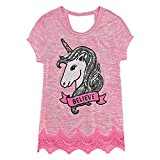

Product Title:  miss chievous juniors striped peplum tank top medium shadowpeach 
Euclidean Distance from input image: 11.065002517844746
Amazon Url: www.amzon.com/dp/B0177DM70S


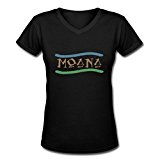

Product Title:  moana logo adults hot v neck shirt black xxl 
Euclidean Distance from input image: 11.073385543967794
Amazon Url: www.amzon.com/dp/B01LX6H43D


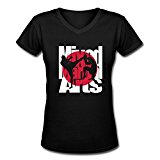

Product Title:  women japanese mixed martial arts teeblack tshirts hgiorgis xxl black 
Euclidean Distance from input image: 11.081240258550809
Amazon Url: www.amzon.com/dp/B01JQ096HW


In [0]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
def idf_w2v_brand_img(doc_id, w1, w2, w3, num_results):
    idf_w2v_dist  = pairwise_distances(w2v_title_weight, w2v_title_weight[doc_id].reshape(1,-1))
    ex_feat_dist = pairwise_distances(extra_features, extra_features[doc_id])
    doc_id = asins.index(df_asins[doc_id])
    img_dist=pairwise_distances(bottleneck_features_train, bottleneck_features_train[doc_id].reshape(1,-1))
    pairwise_dist = (w1 * idf_w2v_dist +  w2 * ex_feat_dist + w3 * img_dist)/float(w1 + w2 + w3)
    
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
   
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    df_indices = list(data.index[indices])
    

    for i in range(len(indices)):
        rows = data[['medium_image_url','title']].loc[data['asin']==asins[indices[i]]]
        for indx, row in rows.iterrows():
            display(Image(url=row['medium_image_url'], embed=True))
            print('Product Title: ', row['title'])
            print('Euclidean Distance from input image:', pdists[i])
            print('Amazon Url: www.amzon.com/dp/'+ asins[indices[i]])
            print('='*125)

idf_w2v_brand_img(12566, 15, 5, 5, 20)
